# Signal Preprocessing for UTS IIoT (TF4061) - 2019
## Engineering Physics / Institut Teknologi Bandung
By : Fadillah Adamsyah Ma'ani - 13316046

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Finite Impulse Response

Discrete Fourier Transform:
$$
X(k)=\sum_{n=0}^{N-1}x(n)\exp(-j\omega_0 k n)
$$
Inverse Discrete Fourier Transform:
$$
x(n)=\frac{1}{N}\sum_{k=0}^{N-1}X(k)\exp(j\omega_0 kn)
$$
with $$\omega_0=2\pi f_0=\frac{2\pi}{T_0}$$
where $f_0$ is the fundamental frequency

## 1. Determine the desired frequency response

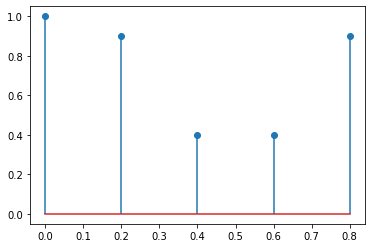

In [2]:
Ts = 1 # sampling time
fs = 1/Ts # sampling frequency

# desired frequency response
H=np.array([1, 0.9, 0.4, 0.4, 0.9])
f1 = np.arange(0,fs,fs/H.shape[0]) # array of frequency

plt.stem(f1,H, use_line_collection=True)
plt.show()

## 2. Find the inverse discrete fourier transform

In [3]:
h=np.fft.ifft(H)

## 3. Plot and analyze the frequency response of FIR for $N$ order filter

$$
H(z) = z^{-(N-1)/2}\,\left[h(0) + \sum_{n=1}^{(N-1)/2}\left(h(-n)z^n +h(n)z^{-n} \right)  \right]
$$
for causal system:
$$
h(-n) = h(n)
$$

In [4]:
f2 = np.arange(0,fs,0.005)
w = 2 * np.pi * f2
z=np.exp(Ts*w*1j)

Remember that:
$$
\exp(-j\omega n T_s)=z^{-n}
$$
then
$$
z = \exp(j\omega T_s)
$$

In [5]:
ht = np.ones(z.shape[0])*h[0]
N = 5 # filter's order
for i in range(1,1+int((N-1)/2)):
    ht = ht + h[i]*(z**(i)+z**(-i))
hh = ht * z**(-(N-1)/2)

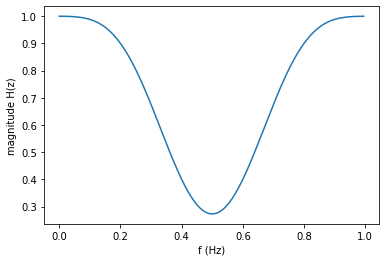

In [6]:
plt.plot(f2,np.absolute(hh))
plt.xlabel('f (Hz)')
plt.ylabel('magnitude H(z)')
plt.show()

## 4. Build the recursive equation

Suppose that $N=5$:
$$H(z)=\frac{Y(z)}{X(z)}=h(2)+h(1)\,z^{-1}+h(0)\,z^{-2}+h(1)\,z^{-3}+h(2)\,z^{-4}$$

$$y(n)=h(2)\,x(n)+h(1)\,x(n-1)+h(0)\,x(n-2)+h(3)\,x(n-3)+h(4)\,x(n-4)$$

<hr>

<center>
Main Repository : <a href="http://github.com/mzprz/uts-iiot"> http://github.com/mzprz/uts-iiot </a> <br>
- 2019 - 
</center>
   

<hr>